# **Sentiment Analysis**

## **Steps**
- import dataset
- inspect dataset
- Data Cleaning

      - reomvoe duplicates

      - handle null valueus

      - remove leading and trailing whitespaces

Univariate Data Analysis

Bivariate Data Analysis

Which platforms drive the most positive engagement?

Which countries show the highest positive vs negative sentiment?

What time of day drives most engagement (likes & retweets)?

Which hashtags drive the most engagement?

Which sentiment generates higher engagement?

Business Insights We Can Expect

Best Platforms: Identify which social platform has most positivity.

Geographic Strategy: Target countries with positive sentiment, address negatives.

Posting Time: Optimal posting hours for engagement.

Hashtag Strategy: Focus on top-performing hashtags.

Message Tone: Check if positive posts get more engagement than negative/neutral.

**Import Dataset**

In [1]:
# import librarie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_csv(
    'dataset/sentiment_dataset.csv', 
    index_col=0, 
    usecols = ['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour']).reset_index()

## **Data Cleaning**

**Removed Duplicates**

In [3]:
# check duplicates
print(f"There are {len(df[df.duplicated()])} duplicated values")

There are 20 duplicated values


In [4]:
# remove duplicates in place
df.drop_duplicates(inplace=True)

# Confirm duplicates removal
df.shape

(712, 13)

**Handle Null Values**

In [5]:
# check for null values
print(f"There are {df.isnull().sum().sum()} null values")

There are 0 null values


In [6]:
# remove leading and trailing whitespaces
df['Text'] = [txt.strip() for txt in list(df['Text'])]
df['Sentiment'] = [sent.strip() for sent in list(df['Sentiment'])]
df['User'] = [usr.strip() for usr in list(df['User'])]
df['Country'] = [country.strip() for country in list(df['Country'])]

df['Platform'] = [pltform.strip() for pltform in list(df['Platform'])]
df['Hashtags'] = [tags.strip() for tags in list(df['Hashtags'])]
df['Hashtags'][0]

'#Nature #Park'

**Remove Outliers**

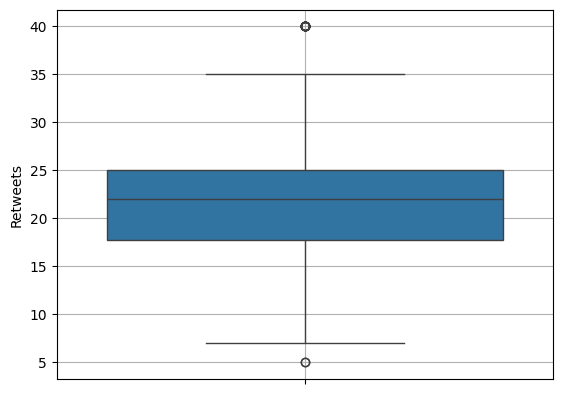

In [7]:
sns.boxplot(df['Retweets'])
plt.grid()

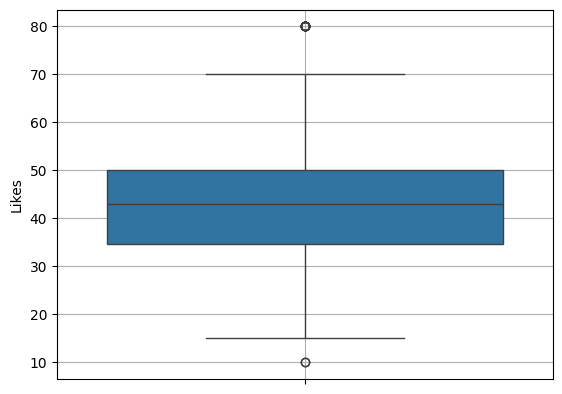

In [8]:
sns.boxplot(df['Likes'])
plt.grid()

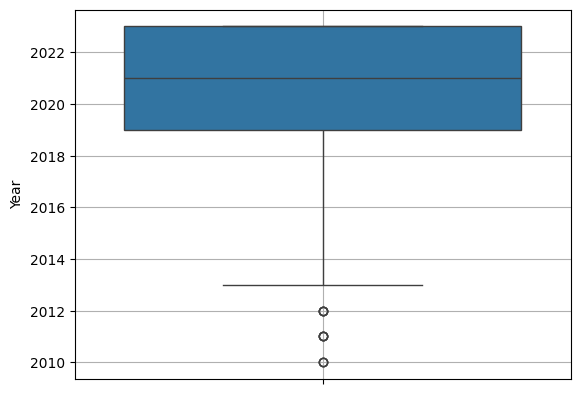

In [9]:
sns.boxplot(df['Year'])
plt.grid()

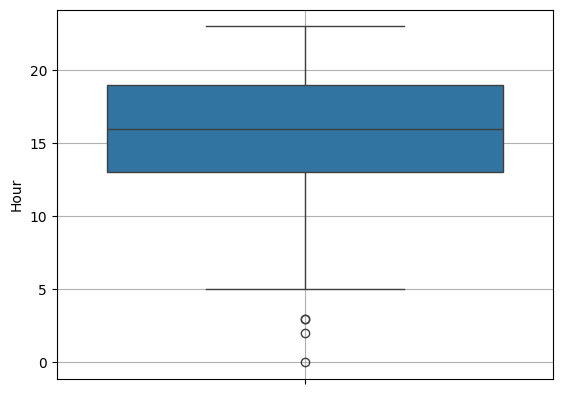

In [10]:
sns.boxplot(df['Hour'])
plt.grid()

**Fix outliers**

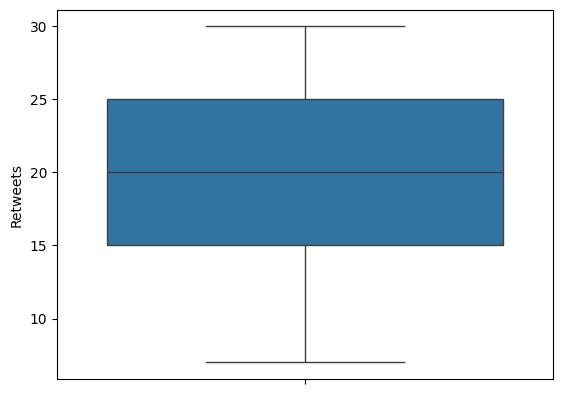

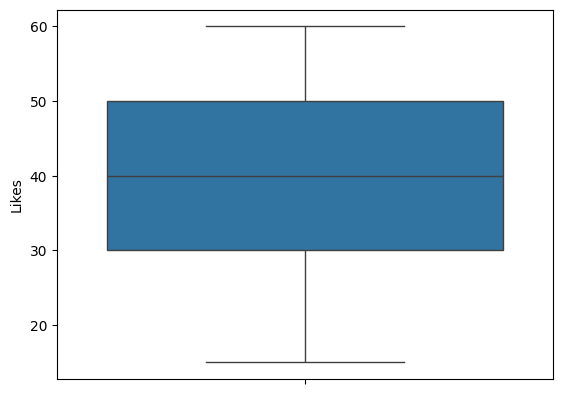

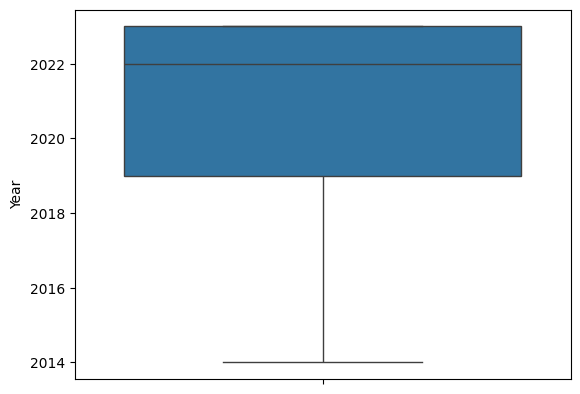

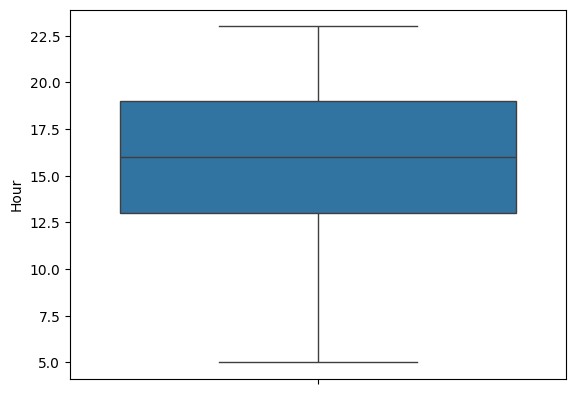

In [11]:
df = df[df['Retweets'] <= 30] # fix outlier on 'Retweets'
df = df[(df['Likes'] >= 15) & (df['Likes'] <= 70)] # fix outlier on 'Likes'
df = df[df['Year'] > 2013]  # fix outlier on 'Year'
df = df[df['Hour'] >= 5] # fix outlier on 'Hour

sns.boxplot(df['Retweets'])
plt.show()

sns.boxplot(df['Likes'])
plt.show()

sns.boxplot(df['Year'])
plt.show()

sns.boxplot(df['Hour'])
plt.show()

## **Exploratory Data Analysis**

In [12]:
# inspect dataset head
df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
5,Feeling grateful for the little things in life.,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9


In [13]:
# inspect dataset tail
df.tail()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20
731,Organizing a virtual talent show during challe...,Happy,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24.0,47.0,USA,2020,11,15,15


In [14]:
# descriptive statistics
df.describe()

,Retweets,Likes,Year,Month,Day,Hour
count,634.000000,634.000000,634.000000,634.000000,634.00000,634.000000
mean,20.255521,40.376972,2020.720820,6.053628,15.55205,15.528391
std,5.780969,11.481210,2.560974,3.456381,8.46093,3.867471
min,7.000000,15.000000,2014.000000,1.000000,1.00000,5.000000
25%,15.000000,30.000000,2019.000000,3.000000,10.00000,13.000000
50%,20.000000,40.000000,2022.000000,6.000000,15.00000,16.000000
75%,25.000000,50.000000,2023.000000,9.000000,22.00000,19.000000
max,30.000000,60.000000,2023.000000,12.000000,31.00000,23.000000


In [15]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       634 non-null    object 
 1   Sentiment  634 non-null    object 
 2   Timestamp  634 non-null    object 
 3   User       634 non-null    object 
 4   Platform   634 non-null    object 
 5   Hashtags   634 non-null    object 
 6   Retweets   634 non-null    float64
 7   Likes      634 non-null    float64
 8   Country    634 non-null    object 
 9   Year       634 non-null    int64  
 10  Month      634 non-null    int64  
 11  Day        634 non-null    int64  
 12  Hour       634 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 69.3+ KB


In [16]:
# convert timestamp to datetime 
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       634 non-null    object        
 1   Sentiment  634 non-null    object        
 2   Timestamp  634 non-null    datetime64[ns]
 3   User       634 non-null    object        
 4   Platform   634 non-null    object        
 5   Hashtags   634 non-null    object        
 6   Retweets   634 non-null    float64       
 7   Likes      634 non-null    float64       
 8   Country    634 non-null    object        
 9   Year       634 non-null    int64         
 10  Month      634 non-null    int64         
 11  Day        634 non-null    int64         
 12  Hour       634 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 69.3+ KB


In [17]:
# data shape
df.shape

(634, 13)

In [18]:
# check for null values
df.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

### **Univariate Data Analysis**

In [19]:
df.columns

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

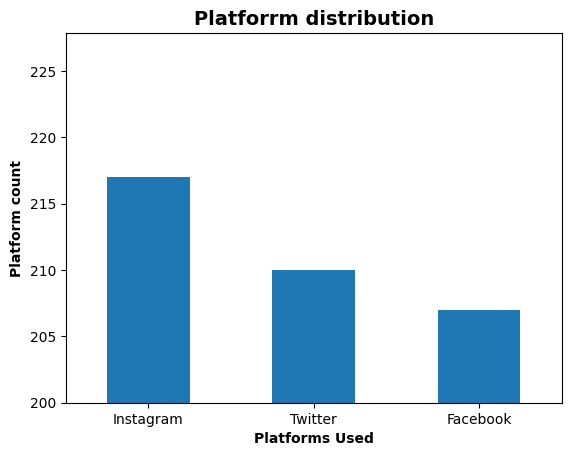

In [20]:
# df['Platform'].value_counts.plot(kind='bar')
df['Platform'].value_counts().plot(kind='bar')
plt.title('Platforrm distribution', fontdict={'fontweight':'bold', 'fontsize':14})
plt.xlabel('Platforms Used',fontdict={'fontweight':'bold'})
plt.ylabel('Platform count',fontdict={'fontweight':'bold'})
plt.xticks(rotation=360, ha='center')
plt.ylim(200)
plt.show();

Text(0, 0.5, 'Countries')

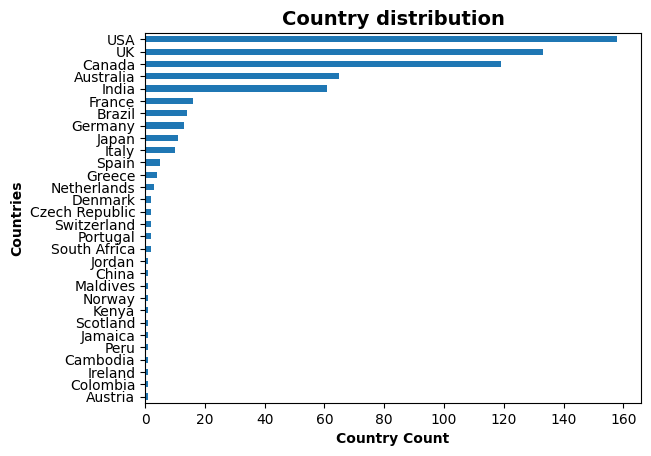

In [21]:
df['Country'].value_counts(ascending=True).plot(kind='barh')
plt.title('Country distribution', fontdict={'fontweight':'bold', 'fontsize':14})

plt.xlabel('Country Count',  fontdict={'fontweight':'bold'})
plt.ylabel('Countries',  fontdict={'fontweight':'bold'})


Sentiment by platform

In [22]:
# number of unique value
print(f'There are {len(df['Sentiment'].unique())} unique values in the sentiment column')
print('This makes it difficult to take on a go. So to top 10 sentiments in each platform would be taken and visualized')

There are 176 unique values in the sentiment column
This makes it difficult to take on a go. So to top 10 sentiments in each platform would be taken and visualized


In [23]:
data = {
    'instagram' : df[df['Platform'] == 'Instagram']['Sentiment'].value_counts(ascending=False)[1:11],
    'facebook' : df[df['Platform'] == 'Facebook']['Sentiment'].value_counts(ascending=False)[1:11],
    'twitter' : df[df['Platform'] == 'Twitter']['Sentiment'].value_counts(ascending=False)[1:11]    
}
platform_sentiment = pd.DataFrame(data)

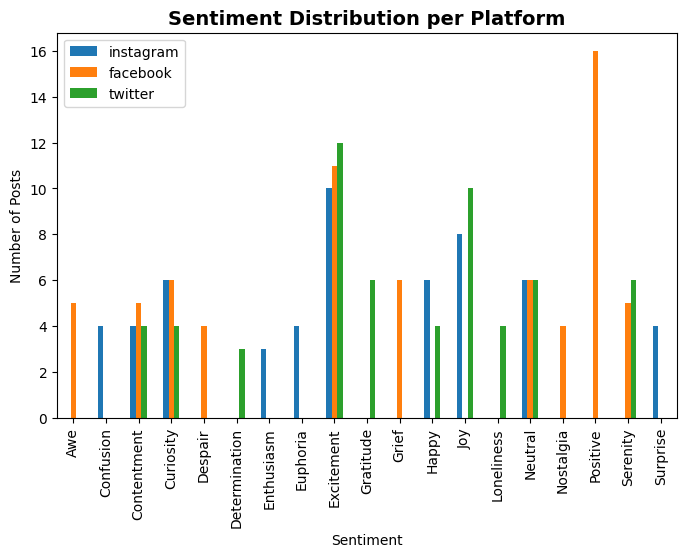

In [24]:
# Sentiment by platform

# Plot sentiment distribution per platform
platform_sentiment = pd.DataFrame(data).plot(kind="bar", figsize=(8,5))
plt.title("Sentiment Distribution per Platform", fontdict={'fontweight':'bold', 'fontsize':14})
plt.ylabel("Number of Posts")
plt.show()

Facebook, from the figure above, drive the most positive engagement on social media platorm.

In [28]:
# Count sentiment per country
# country_sentiment = df.groupby(["Country","Sentiment"]).size().unstack().fillna(0)

# # Plot
# country_sentiment.plot(kind="bar", stacked=True, figsize=(10,6))
# plt.title("Sentiment by Country")
# plt.ylabel("Number of Posts")
# plt.show()

from collections import Counter

sentiment_counts = dict(Counter(df['Sentiment']))
positive_list = ['positive', 'happiness', 'joy', ]


positive_country = []
negative_country = []

negative_list = ['Negative', 'Anger', 'Fear', 'Sadness', 'Disgust',  'Disappointed',  'Bitter', 'Confusion','Shame','Grief', 'Loneliness', 'Jealousy', 'Resentment', 'Frustration', 'Boredom', 'Anxiety', 'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Despair', 'Indifference', 'Numbness', 'Melancholy', 'Bitterness', 'Apprehensive', 'Overwhelmed', 'Jealous', 'Devastated', 'Frustrated', 'Envious', 'Dismissive', 'Fearful','Pensive', 'Betrayal', 'Suffering', 'EmotionalStorm', 'Disappointment', 'LostLove', 'Sorrow', 'Darkness', 'Ruins', 'Desolation', 'Isolation', 'Loss', 'Heartache', 'Solitude', 'Obstacle', 'Miscalculation', 'Mischievous', 'Sad', 'Hate', 'Bad',]
positive_list = ['Positive','Nostalgia','Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection', 'Awe', 'Acceptance', 'Adoration', 'Anticipation','Calmness', 'Excitement', 'Kind', 'Pride',  'Euphoria', 'Serenity', 'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm', 'Fulfillment', 'Reverence','Elation', 'Contentment', 'Hope', 'Curiosity', 'Ambivalence', 'Determination', 'Zest', 'Hopeful', 'Proud', 'Grateful', 'Compassionate', 'Playful', 'Free-spirited', 'Inspired', 'Confident','Overjoyed', 'Inspiration', 'Gratitude', 'Contemplation', 'JoyfulReunion', 'Satisfaction', 'Blessed', 'Appreciation', 'Confidence', 'Accomplishment', 'Optimism', 'Enchantment', 'Intrigue', 'PlayfulJoy', 'DreamChaser', 'Elegance', 'Whimsy', 'Thrill', 'Creativity','Radiance', 'Rejuvenation', 'Coziness', 'Melodic', 'FestiveJoy', 'Freedom',  'Reflection', 'Adrenaline', 'ArtisticBurst', 'Immersion', 'Spark', 'Marvel','Heartbreak', 'Positivity','Kindness', 'Friendship', 'Success', 'Exploration', 'Amazement', 'Romance', 'Captivation', 'Wonder', 'Adventure', 'Tranquility', 'Grandeur', 'Celebration', 'Charm', 'Emotion', 'Colorful', 'Hypnotic', 'Connection', 'Iconic', 'Engagement', 'Touched', 'Triumph', 'Heartwarming', 'Sympathy', 'Pressure', 'Renewed Effort', 'Solace', 'Breakthrough', 'Harmony', 'Joy in Baking', 'Envisioning History', 'Vibrancy', 'Winter Magic','Thrilling Journey', "Nature's Beauty", 'Celestial Wonder', 'Creative Inspiration', 'Runway Creativity', "Ocean's Freedom", 'Relief', 'Embarrassed']

for k,v  in enumerate(df):
    print(k)
    # if data['Sentiment'] in positive_list:
    #     positive_country.append(data['Country'])
    # elif data['Sentiment'] in negative_list:
    #     negative_country.append(data['Country'])
    

# Counter(positive_country)



0
1
2
3
4
5
6
7
8
9
10
11
12


In [26]:
for country in df['Country'].unique():
    # print(country)
    pass

data = {
    'instagram' : df[df['Platform'] == 'Instagram']['Sentiment'].value_counts(ascending=False)[1:11],
    'facebook' : df[df['Platform'] == 'Facebook']['Sentiment'].value_counts(ascending=False)[1:11],
    'twitter' : df[df['Platform'] == 'Twitter']['Sentiment'].value_counts(ascending=False)[1:11]    
}
platform_sentiment = pd.DataFrame(data)

df.groupby(['Platform', 'Country'])['Sentiment'].value_counts().unstack().fillna(0)[1:11]

Sentiment                Acceptance  Accomplishment  Admiration  Adoration  \
Platform Country                                                             
Facebook Austria                0.0             0.0         0.0        0.0   
         Brazil                 0.0             0.0         0.0        0.0   
         Canada                 2.0             0.0         0.0        0.0   
         Colombia               0.0             0.0         0.0        0.0   
         Czech Republic         0.0             0.0         0.0        0.0   
         France                 0.0             0.0         0.0        0.0   
         Germany                0.0             1.0         0.0        0.0   
         Greece                 0.0             0.0         0.0        0.0   
         India                  0.0             0.0         0.0        0.0   
         Italy                  0.0             0.0         0.0        0.0   

Sentiment                Adrenaline  Adventure  Affection  Amazement  \
Platform Country                                                       
Facebook Austria                0.0        0.0        0.0        0.0   
         Brazil                 0.0        0.0        0.0        0.0   
         Canada                 0.0        0.0        0.0        0.0   
         Colombia               0.0        0.0        0.0        0.0   
         Czech Republic         0.0        0.0        0.0        0.0   
         France                 0.0        0.0        0.0        0.0   
         Germany                1.0        0.0        0.0        0.0   
         Greece                 0.0        0.0        0.0        0.0   
         India                  0.0        0.0        0.0        0.0   
         Italy                  0.0        0.0        0.0        0.0   

Sentiment                Ambivalence  Amusement  ...  Thrilling Journey  \
Platform Country                                 ...                      
Facebook Austria                 0.0        0.0  ...                0.0   
         Brazil                  0.0        0.0  ...                0.0   
         Canada                  0.0        1.0  ...                0.0   
         Colombia                0.0        0.0  ...                0.0   
         Czech Republic          0.0        0.0  ...                0.0   
         France                  0.0        0.0  ...                0.0   
         Germany                 0.0        0.0  ...                0.0   
         Greece                  0.0        0.0  ...                0.0   
         India                   0.0        0.0  ...                0.0   
         Italy                   0.0        0.0  ...                0.0   

Sentiment                Touched  Tranquility  Triumph  Vibrancy  Whimsy  \
Platform Country                                                           
Facebook Austria             0.0          0.0      0.0       0.0     0.0   
         Brazil              0.0          0.0      0.0       0.0     0.0   
         Canada              0.0          0.0      0.0       0.0     0.0   
         Colombia            0.0          0.0      0.0       0.0     0.0   
         Czech Republic      0.0          0.0      0.0       0.0     0.0   
         France              0.0          0.0      0.0       0.0     0.0   
         Germany             0.0          0.0      0.0       0.0     0.0   
         Greece              0.0          0.0      0.0       0.0     0.0   
         India               0.0          0.0      0.0       0.0     0.0   
         Italy               0.0          0.0      0.0       0.0     0.0   

Sentiment                Winter Magic  Wonder  Yearning  Zest  
Platform Country                                               
Facebook Austria                  0.0     0.0       0.0   0.0  
         Brazil                   0.0     0.0       0.0   0.0  
         Canada                   1.0     0.0       0.0   0.0  
         Colombia                 0.0     0.0       0.0   0.0  


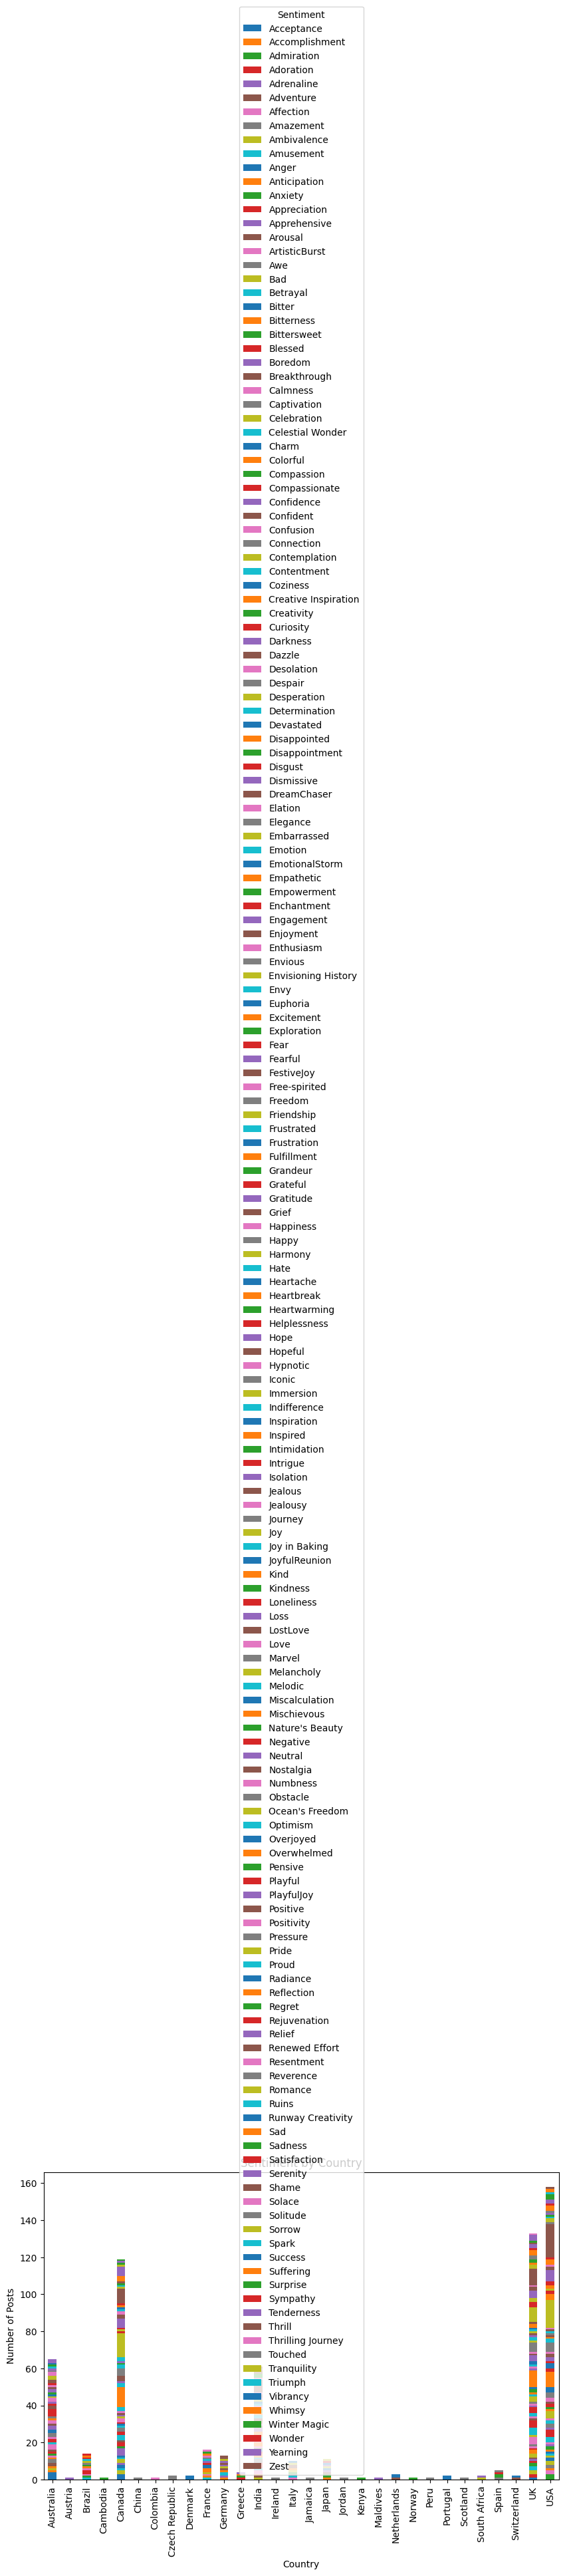

In [27]:
country_sentiment = df.groupby(["Country","Sentiment"]).size().unstack().fillna(0)
# Plot
country_sentiment.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Sentiment by Country")
plt.ylabel("Number of Posts")
plt.show()

<Axes: xlabel='Sentiment'>

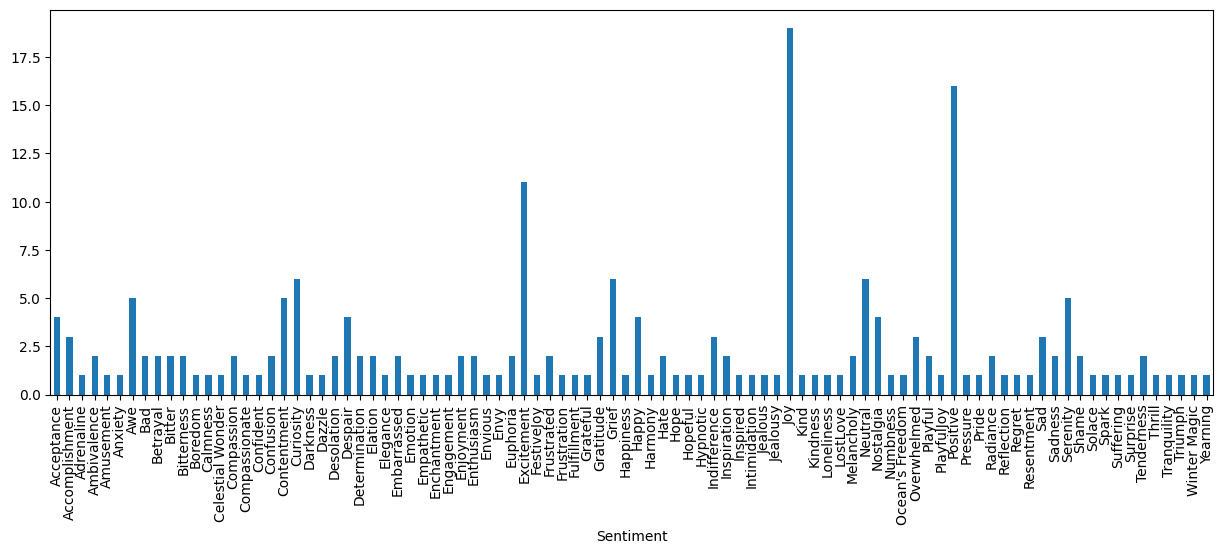

In [105]:
platform_sentiment.loc['Facebook'].dropna().plot(kind='bar', figsize=(15,5))